<a href="https://colab.research.google.com/github/natalyaldarf/machine-learning/blob/main/main_project_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
data = pd.read_csv('/content/IMDB_Dataset-1.csv', engine='python', on_bad_lines='warn')
data.head()

<ipython-input-17-425b6bb6ec8a>:2: ParserWarning: Skipping line 12646: unexpected end of data

  data = pd.read_csv('/content/IMDB_Dataset-1.csv', engine='python', on_bad_lines='warn')


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12644 entries, 0 to 12643
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     12644 non-null  object
 1   sentiment  12644 non-null  object
dtypes: object(2)
memory usage: 197.7+ KB


sentiment
negative    6361
positive    6283
Name: count, dtype: int64


<Axes: xlabel='sentiment', ylabel='count'>

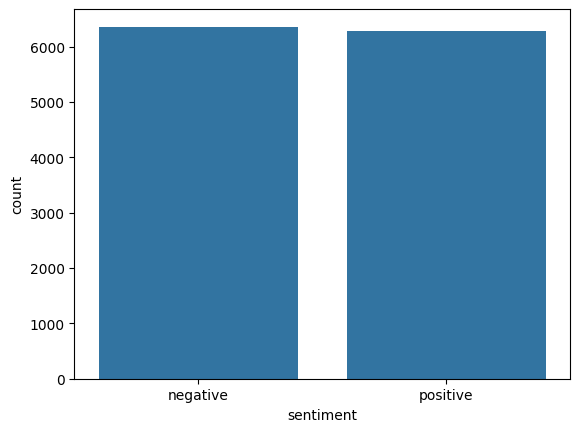

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
print(data['sentiment'].value_counts())
sns.barplot(data['sentiment'].value_counts())

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Preprocessing function
def preprocess_data(data):
    # Assuming 'review' and 'sentiment' columns exist
    data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

    # Check class distribution after conversion
    print(data['sentiment'].value_counts())

    X = data['review']
    y = data['sentiment']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Check class distribution in the training set
    print(pd.Series(y_train).value_counts())

    # Vectorize the text data using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    return X_train, X_test, y_train, y_test, vectorizer


#logistic regression

In [21]:
# Load and preprocess data
X_train, X_test, y_train, y_test, vectorizer = preprocess_data(data)

''''# Train models function
def train_models(X_train, y_train):
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)

    return models'''
Logistic_Regression=LogisticRegression(random_state=42)
Logistic_Regression.fit(X_train, y_train)
y_pred = Logistic_Regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print("\n")


sentiment
0    6361
1    6283
Name: count, dtype: int64
sentiment
0    5089
1    5026
Name: count, dtype: int64
Accuracy: 0.874654013444049
Confusion Matrix:
[[1097  175]
 [ 142 1115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1272
           1       0.86      0.89      0.88      1257

    accuracy                           0.87      2529
   macro avg       0.87      0.87      0.87      2529
weighted avg       0.87      0.87      0.87      2529





#random forest

In [9]:
Random_Forest=RandomForestClassifier(random_state=42)
Random_Forest.fit(X_train, y_train)
y_pred = Random_Forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print("\n")

KeyboardInterrupt: 

#svm

In [22]:
SVM=SVC(probability=True, random_state=42)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print("\n")

Accuracy: 0.8742586002372479
Confusion Matrix:
[[1092  180]
 [ 138 1119]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1272
           1       0.86      0.89      0.88      1257

    accuracy                           0.87      2529
   macro avg       0.87      0.87      0.87      2529
weighted avg       0.87      0.87      0.87      2529





#gradio

In [23]:
!pip install pandas scikit-learn gradio
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [24]:
# Gradio interface function
def classify_review(text):
    text_vectorized = vectorizer.transform([text])
    prediction = Logistic_Regression.predict(text_vectorized)[0]
    probability =Logistic_Regression.predict_proba(text_vectorized)[0]

    sentiment = "Positive" if prediction == 1 else "Negative"
    confidence = max(probability) * 100

    return sentiment, {"Negative": probability[0], "Positive": probability[1]}


# Set up Gradio interface
interface = gr.Interface(
    fn=classify_review,
    inputs=gr.Textbox(lines=5, label="Enter IMDB Movie Review"),
    outputs=[
        gr.Textbox(label="Sentiment"),
        gr.Label(num_top_classes=2, label="Confidence")
    ],
    title="IMDB Movie Review Sentiment Analysis",
    description="Enter a movie review and get the predicted sentiment (positive or negative)."
)

# Launch the Gradio interface
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f77b3f1cddba7dc25d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
